In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
import os

path = os.listdir(r'C:\Users\Lenovo\Documents\Zahid\MAKAUT\Project\Data\train/')
classes = {'adenocarcinoma':0, 'large_cell_carcinoma':1, 'normal':2, 'squamous_cell_carcinoma':3}

In [3]:
import cv2
X = []
Y = []
for cls in classes:
    pth = r'C:\Users\Lenovo\Documents\Zahid\MAKAUT\Project\Data\train/'+cls
    for j in os.listdir(pth):
        img = cv2.imread(pth+'/'+j, 0)
        img = cv2.resize(img, (200,200))
        X.append(img)
        Y.append(classes[cls])

In [4]:
X = np.array(X)
Y = np.array(Y)

X_updated = X.reshape(len(X), -1)

In [5]:
np.unique(Y)

array([0, 1, 2, 3])

In [6]:
pd.Series(Y).value_counts()

0    195
3    155
2    148
1    115
dtype: int64

In [7]:
X.shape, X_updated.shape

((613, 200, 200), (613, 40000))

#### Visualize Data

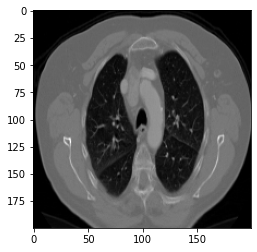

In [8]:
plt.imshow(X[0], cmap='gray')

In [9]:
X_updated = X.reshape(len(X), -1)
X_updated.shape

(613, 40000)

In [10]:
xtrain, xtest, ytrain, ytest = train_test_split(X_updated, Y, random_state=10,
                                               test_size=.20)

In [11]:
xtrain.shape, xtest.shape

((490, 40000), (123, 40000))

#### Feature Scaling

In [12]:
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())
xtrain = xtrain/255
xtest = xtest/255
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())

255 0
255 0
1.0 0.0
1.0 0.0


#### PCA

In [13]:
from sklearn.decomposition import PCA
print(xtrain.shape, xtest.shape)

pca = PCA(.98)
# pca_train = pca.fit_transform(xtrain)
# pca_test = pca.transform(xtest)
pca_train = xtrain
pca_test = xtest

(490, 40000) (123, 40000)


####  Model 1: Logistic Regression

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

lg = LogisticRegression(C=0.1)
lg.fit(xtrain, ytrain)

LogisticRegression(C=0.1)

In [16]:
print("Training Score:", lg.score(xtrain, ytrain))
print("Testing Score:", lg.score(xtest, ytest))

Training Score: 1.0
Testing Score: 0.8373983739837398


In [17]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


lg.fit(xtrain, ytrain)
predictions = lg.predict(xtest)
val1 = (accuracy_score(ytest, predictions)*100)
print("*Accuracy score for Logistic Regression: ", val1, "\n")
print("*Confusion Matrix for Logistic Regression: ")
print(confusion_matrix(ytest, predictions))
print("*Classification Report for Logistice Regression: ")
print(classification_report(ytest, predictions))

*Accuracy score for Logistic Regression:  83.73983739837398 

*Confusion Matrix for Logistic Regression: 
[[38  2  1  2]
 [ 5 16  0  3]
 [ 0  0 28  0]
 [ 5  2  0 21]]
*Classification Report for Logistice Regression: 
              precision    recall  f1-score   support

           0       0.79      0.88      0.84        43
           1       0.80      0.67      0.73        24
           2       0.97      1.00      0.98        28
           3       0.81      0.75      0.78        28

    accuracy                           0.84       123
   macro avg       0.84      0.83      0.83       123
weighted avg       0.84      0.84      0.83       123



In [18]:
pred = lg.predict(xtest)

In [19]:
misclassified=np.where(ytest!=pred)
misclassified

(array([  9,  17,  20,  23,  30,  33,  36,  37,  43,  44,  47,  48,  59,
         62,  63,  76,  82,  85, 106, 118], dtype=int64),)

In [20]:
print("Total Misclassified Samples: ",len(misclassified[0]))
print(pred[36],ytest[36])

Total Misclassified Samples:  20
3 0


In [21]:
dec = {0:'Adenocarcinoma', 1:'Large Scale Carcinoma', 2:'Normal', 3:'Squamous Cell Carcinoma'}

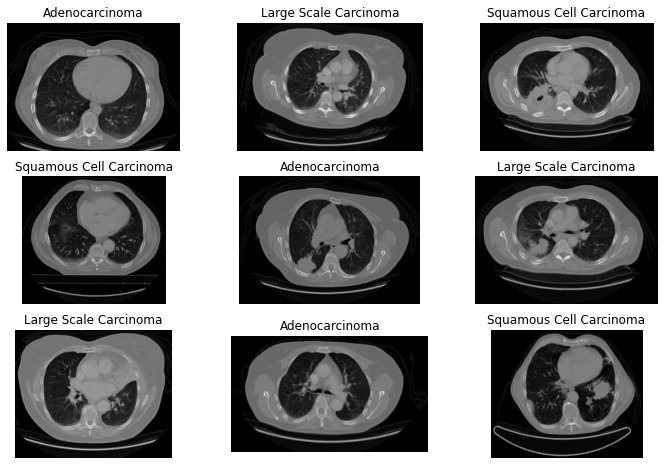

In [22]:
plt.figure(figsize=(12,8))
p = os.listdir(r'C:\Users\Lenovo\Documents\Zahid\MAKAUT\Project\Data\test/')
c=1
for i in os.listdir(r'C:\Users\Lenovo\Documents\Zahid\MAKAUT\Project\Data\test\adenocarcinoma/')[:9]:
    plt.subplot(3,3,c)
    
    img = cv2.imread(r'C:\Users\Lenovo\Documents\Zahid\MAKAUT\Project\Data\test\adenocarcinoma/'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = lg.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1

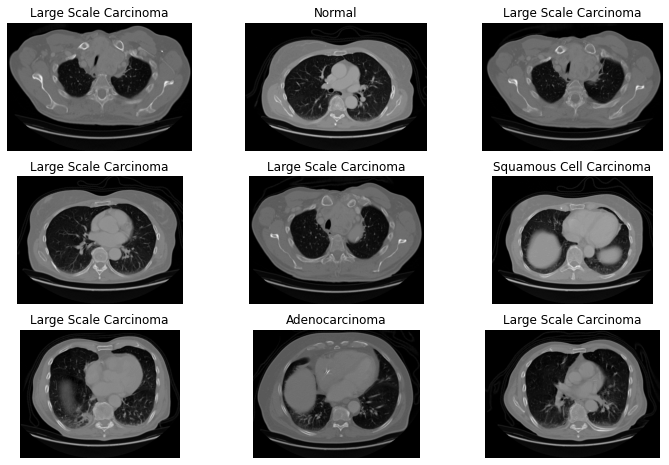

In [23]:
plt.figure(figsize=(12,8))
p = os.listdir(r'C:\Users\Lenovo\Documents\Zahid\MAKAUT\Project\Data\test/')
c=1
for i in os.listdir(r'C:\Users\Lenovo\Documents\Zahid\MAKAUT\Project\Data\test\large.cell.carcinoma/')[:9]:
    plt.subplot(3,3,c)
    
    img = cv2.imread(r'C:\Users\Lenovo\Documents\Zahid\MAKAUT\Project\Data\test\large.cell.carcinoma/'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = lg.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1

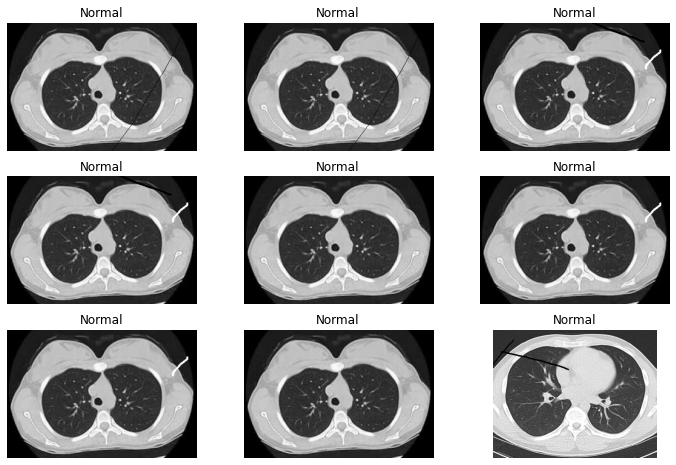

In [24]:
plt.figure(figsize=(12,8))
p = os.listdir(r'C:\Users\Lenovo\Documents\Zahid\MAKAUT\Project\Data\test/')
c=1
for i in os.listdir(r'C:\Users\Lenovo\Documents\Zahid\MAKAUT\Project\Data\test\normal/')[:9]:
    plt.subplot(3,3,c)
    
    img = cv2.imread(r'C:\Users\Lenovo\Documents\Zahid\MAKAUT\Project\Data\test\normal/'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = lg.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1

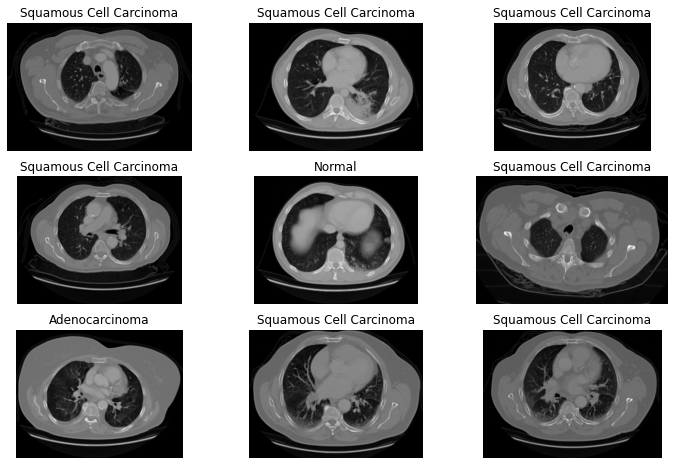

In [25]:
plt.figure(figsize=(12,8))
p = os.listdir(r'C:\Users\Lenovo\Documents\Zahid\MAKAUT\Project\Data\test/')
c=1
for i in os.listdir(r'C:\Users\Lenovo\Documents\Zahid\MAKAUT\Project\Data\test\squamous.cell.carcinoma/')[:9]:
    plt.subplot(3,3,c)
    
    img = cv2.imread(r'C:\Users\Lenovo\Documents\Zahid\MAKAUT\Project\Data\test\squamous.cell.carcinoma/'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = lg.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1

In [26]:
lg_accuracy_score=lg.score(xtest,ytest)*100
lg_accuracy_percent=round(lg_accuracy_score,2)
print(lg_accuracy_percent,"%")

83.74 %


#### Model 2: Support Vector Machine

In [27]:
sv = SVC()
sv.fit(xtrain, ytrain)

SVC()

In [28]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


SVM = SVC()
SVM.fit(xtrain, ytrain)
predictions = SVM.predict(xtest)
val1 = (accuracy_score(ytest, predictions)*100)
print("*Accuracy score for SVM: ", val1, "\n")
print("*Confusion Matrix for SVM: ")
print(confusion_matrix(ytest, predictions))
print("*Classification Report for SVM: ")
print(classification_report(ytest, predictions))

*Accuracy score for SVM:  78.04878048780488 

*Confusion Matrix for SVM: 
[[38  0  4  1]
 [ 6 14  2  2]
 [ 0  2 26  0]
 [ 9  0  1 18]]
*Classification Report for SVM: 
              precision    recall  f1-score   support

           0       0.72      0.88      0.79        43
           1       0.88      0.58      0.70        24
           2       0.79      0.93      0.85        28
           3       0.86      0.64      0.73        28

    accuracy                           0.78       123
   macro avg       0.81      0.76      0.77       123
weighted avg       0.80      0.78      0.77       123



In [29]:
pred = sv.predict(xtest)

In [30]:
dec = {0:'Adenocarcinoma', 1:'Large Scale Carcinoma', 2:'Normal', 3:'Squamous Cell Carcinoma'}

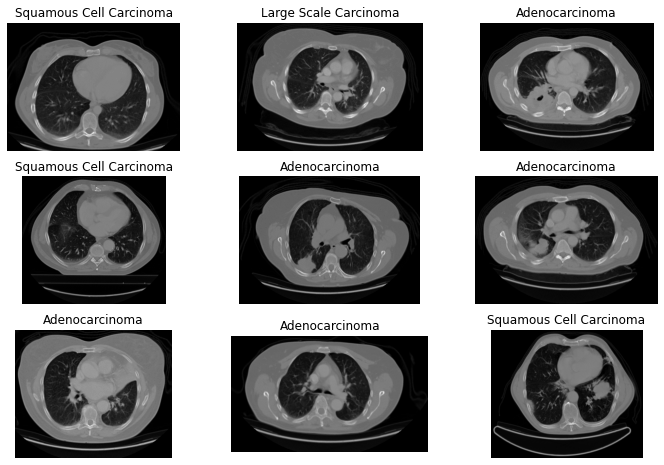

In [31]:
plt.figure(figsize=(12,8))
p = os.listdir(r'C:\Users\Lenovo\Documents\Zahid\MAKAUT\Project\Data\test/')
c=1
for i in os.listdir(r'C:\Users\Lenovo\Documents\Zahid\MAKAUT\Project\Data\test\adenocarcinoma/')[:9]:
    plt.subplot(3,3,c)
    
    img = cv2.imread(r'C:\Users\Lenovo\Documents\Zahid\MAKAUT\Project\Data\test\adenocarcinoma/'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1

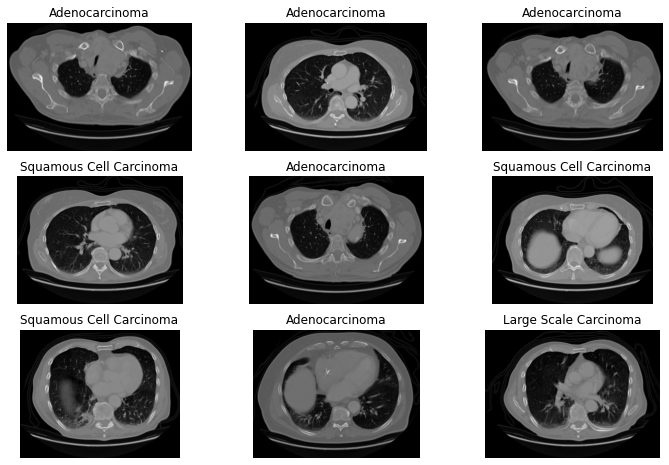

In [32]:
plt.figure(figsize=(12,8))
p = os.listdir(r'C:\Users\Lenovo\Documents\Zahid\MAKAUT\Project\Data\test/')
c=1
for i in os.listdir(r'C:\Users\Lenovo\Documents\Zahid\MAKAUT\Project\Data\test\large.cell.carcinoma/')[:9]:
    plt.subplot(3,3,c)
    
    img = cv2.imread(r'C:\Users\Lenovo\Documents\Zahid\MAKAUT\Project\Data\test\large.cell.carcinoma/'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1

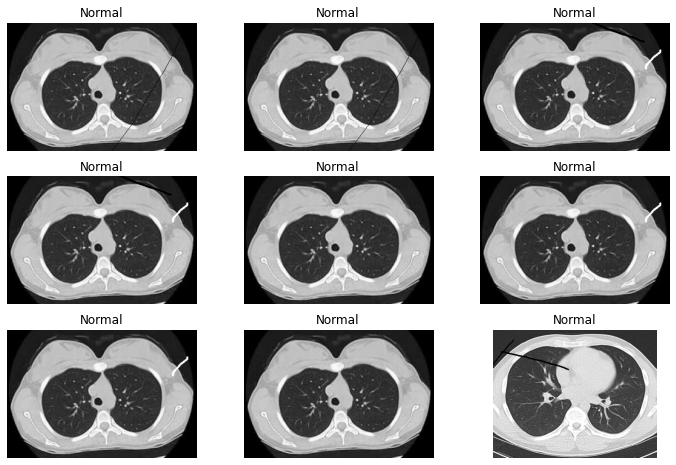

In [33]:
plt.figure(figsize=(12,8))
p = os.listdir(r'C:\Users\Lenovo\Documents\Zahid\MAKAUT\Project\Data\test/')
c=1
for i in os.listdir(r'C:\Users\Lenovo\Documents\Zahid\MAKAUT\Project\Data\test\normal/')[:9]:
    plt.subplot(3,3,c)
    
    img = cv2.imread(r'C:\Users\Lenovo\Documents\Zahid\MAKAUT\Project\Data\test\normal/'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1

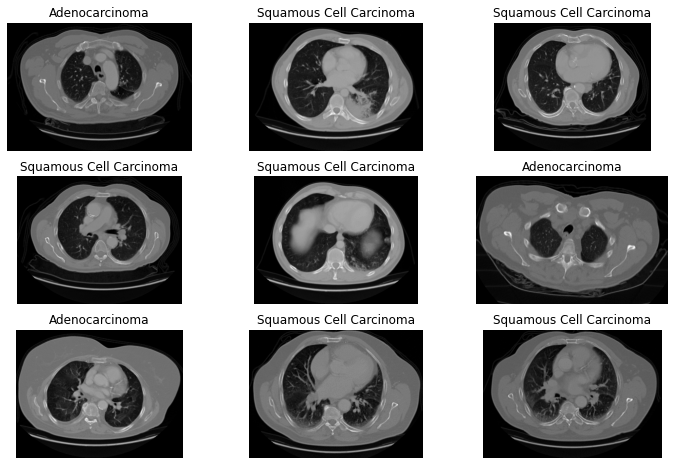

In [34]:
plt.figure(figsize=(12,8))
p = os.listdir(r'C:\Users\Lenovo\Documents\Zahid\MAKAUT\Project\Data\test/')
c=1
for i in os.listdir(r'C:\Users\Lenovo\Documents\Zahid\MAKAUT\Project\Data\test\squamous.cell.carcinoma/')[:9]:
    plt.subplot(3,3,c)
    
    img = cv2.imread(r'C:\Users\Lenovo\Documents\Zahid\MAKAUT\Project\Data\test\squamous.cell.carcinoma/'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1

In [35]:
svm_accuracy_score=sv.score(xtest,ytest)*100
svm_accuracy_percent=round(svm_accuracy_score,2)
print(svm_accuracy_percent,"%")

78.05 %


#### Model 3: Naives Bayes

In [36]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [37]:
model.fit(xtrain, ytrain)

GaussianNB()

In [38]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


model.fit(xtrain, ytrain)
predictions = model.predict(xtest)
val1 = (accuracy_score(ytest, predictions)*100)
print("*Accuracy score for Naives Bayes: ", val1, "\n")
print("*Confusion Matrix for Naives Bayes: ")
print(confusion_matrix(ytest, predictions))
print("*Classification Report for Naives Bayes: ")
print(classification_report(ytest, predictions))

*Accuracy score for Naives Bayes:  59.34959349593496 

*Confusion Matrix for Naives Bayes: 
[[13 18  8  4]
 [ 0 21  2  1]
 [ 2  1 25  0]
 [ 8  4  2 14]]
*Classification Report for Naives Bayes: 
              precision    recall  f1-score   support

           0       0.57      0.30      0.39        43
           1       0.48      0.88      0.62        24
           2       0.68      0.89      0.77        28
           3       0.74      0.50      0.60        28

    accuracy                           0.59       123
   macro avg       0.61      0.64      0.59       123
weighted avg       0.61      0.59      0.57       123



In [39]:
pred = model.predict(xtest)

In [40]:
misclassified=np.where(ytest!=pred)
misclassified

(array([  3,   5,   7,   8,  12,  23,  24,  25,  26,  27,  29,  30,  33,
         35,  40,  41,  44,  48,  49,  52,  55,  57,  58,  59,  60,  63,
         64,  66,  68,  69,  75,  76,  79,  80,  91,  94,  97,  98,  99,
        102, 104, 105, 107, 109, 110, 114, 115, 117, 121, 122], dtype=int64),)

In [41]:
dec = {0:'Adenocarcinoma', 1:'Large Scale Carcinoma', 2:'Normal', 3:'Squamous Cell Carcinoma'}

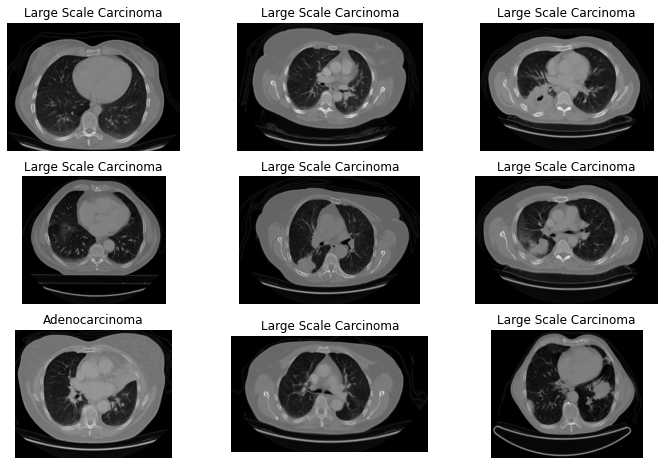

In [42]:
plt.figure(figsize=(12,8))
p = os.listdir(r'C:\Users\Lenovo\Documents\Zahid\MAKAUT\Project\Data\test/')
c=1
for i in os.listdir(r'C:\Users\Lenovo\Documents\Zahid\MAKAUT\Project\Data\test\adenocarcinoma/')[:9]:
    plt.subplot(3,3,c)
    
    img = cv2.imread(r'C:\Users\Lenovo\Documents\Zahid\MAKAUT\Project\Data\test\adenocarcinoma/'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = model.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1

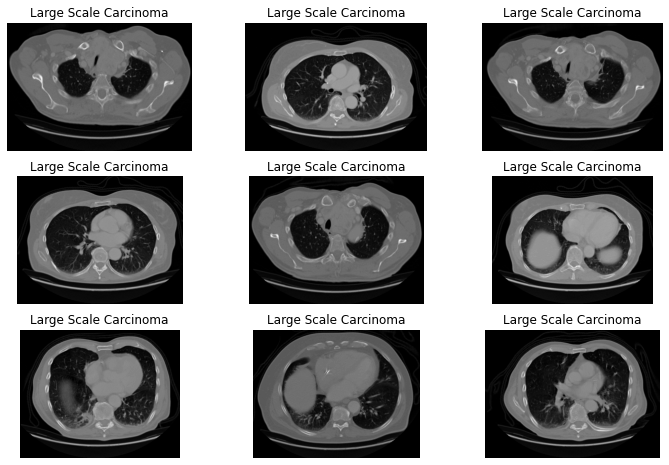

In [43]:
plt.figure(figsize=(12,8))
p = os.listdir(r'C:\Users\Lenovo\Documents\Zahid\MAKAUT\Project\Data\test/')
c=1
for i in os.listdir(r'C:\Users\Lenovo\Documents\Zahid\MAKAUT\Project\Data\test\large.cell.carcinoma/')[:9]:
    plt.subplot(3,3,c)
    
    img = cv2.imread(r'C:\Users\Lenovo\Documents\Zahid\MAKAUT\Project\Data\test\large.cell.carcinoma/'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = model.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1

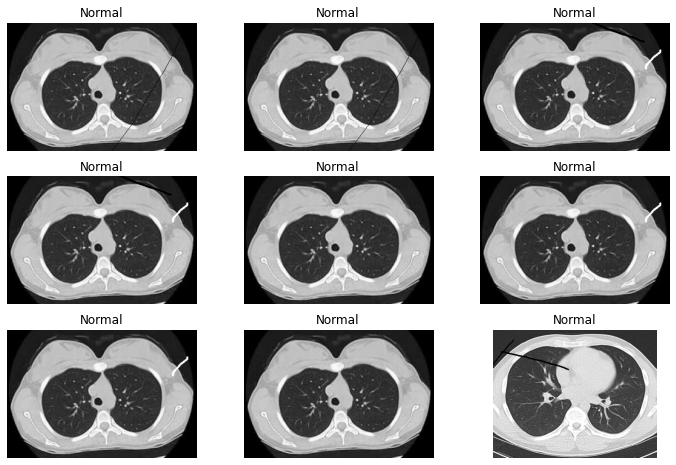

In [44]:
plt.figure(figsize=(12,8))
p = os.listdir(r'C:\Users\Lenovo\Documents\Zahid\MAKAUT\Project\Data\test/')
c=1
for i in os.listdir(r'C:\Users\Lenovo\Documents\Zahid\MAKAUT\Project\Data\test\normal/')[:9]:
    plt.subplot(3,3,c)
    
    img = cv2.imread(r'C:\Users\Lenovo\Documents\Zahid\MAKAUT\Project\Data\test\normal/'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = model.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1

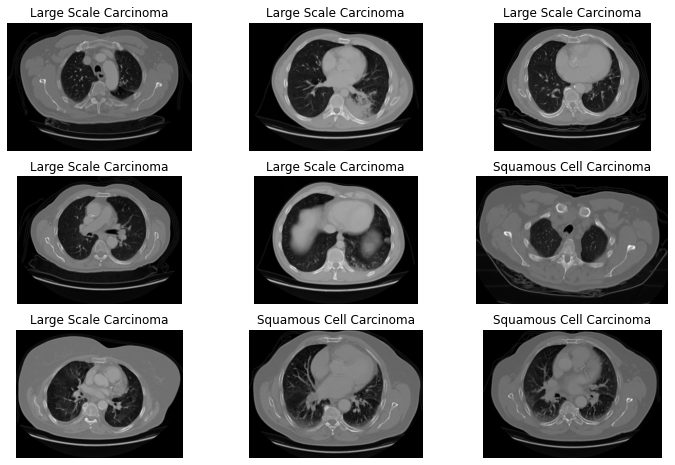

In [45]:
plt.figure(figsize=(12,8))
p = os.listdir(r'C:\Users\Lenovo\Documents\Zahid\MAKAUT\Project\Data\test/')
c=1
for i in os.listdir(r'C:\Users\Lenovo\Documents\Zahid\MAKAUT\Project\Data\test\squamous.cell.carcinoma/')[:9]:
    plt.subplot(3,3,c)
    
    img = cv2.imread(r'C:\Users\Lenovo\Documents\Zahid\MAKAUT\Project\Data\test\squamous.cell.carcinoma/'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = model.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1

In [47]:
model_accuracy_score=model.score(xtest,ytest)*100
model_accuracy_percent=round(model_accuracy_score,2)
print(model_accuracy_percent,"%")

59.35 %


#### Model 4: Random Forest 

In [48]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(xtrain, ytrain)


RandomForestClassifier()

In [51]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
predictions = RF.predict(xtest)

#  prediction Summary by species
print(classification_report(ytest, predictions))
print(confusion_matrix(ytest, predictions))
# Accuracy score
RF_SC = accuracy_score(predictions,ytest)
print(f"{round(RF_SC*100,2)}% Accurate")

              precision    recall  f1-score   support

           0       0.78      0.88      0.83        43
           1       0.89      0.67      0.76        24
           2       0.82      1.00      0.90        28
           3       0.86      0.68      0.76        28

    accuracy                           0.82       123
   macro avg       0.84      0.81      0.81       123
weighted avg       0.83      0.82      0.82       123

[[38  2  1  2]
 [ 5 16  2  1]
 [ 0  0 28  0]
 [ 6  0  3 19]]
82.11% Accurate


In [54]:
pred = RF.predict(xtest)

In [56]:
dec = {0:'Adenocarcinoma', 1:'Large Scale Carcinoma', 2:'Normal', 3:'Squamous Cell Carcinoma'}

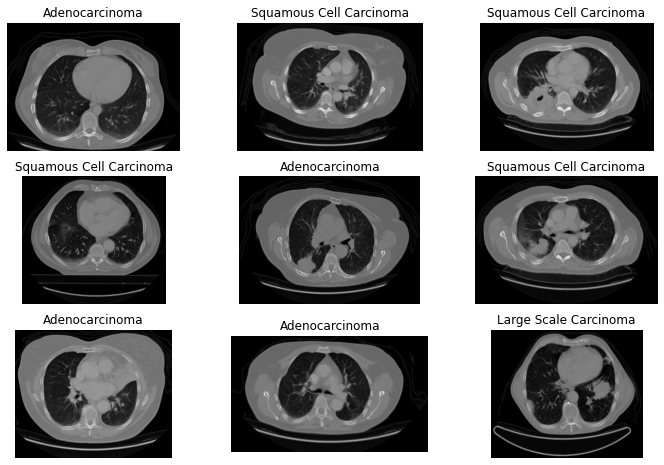

In [58]:
plt.figure(figsize=(12,8))
p = os.listdir(r'C:\Users\Lenovo\Documents\Zahid\MAKAUT\Project\Data\test/')
c=1
for i in os.listdir(r'C:\Users\Lenovo\Documents\Zahid\MAKAUT\Project\Data\test\adenocarcinoma/')[:9]:
    plt.subplot(3,3,c)
    
    img = cv2.imread(r'C:\Users\Lenovo\Documents\Zahid\MAKAUT\Project\Data\test\adenocarcinoma/'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = RF.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1

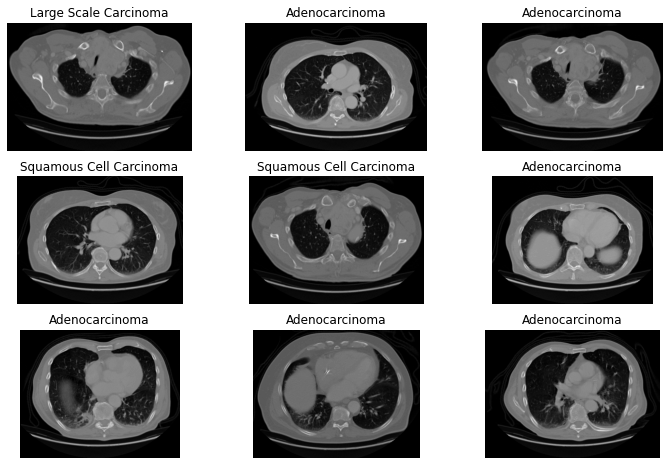

In [59]:
plt.figure(figsize=(12,8))
p = os.listdir(r'C:\Users\Lenovo\Documents\Zahid\MAKAUT\Project\Data\test/')
c=1
for i in os.listdir(r'C:\Users\Lenovo\Documents\Zahid\MAKAUT\Project\Data\test\large.cell.carcinoma/')[:9]:
    plt.subplot(3,3,c)
    
    img = cv2.imread(r'C:\Users\Lenovo\Documents\Zahid\MAKAUT\Project\Data\test\large.cell.carcinoma/'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = RF.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1

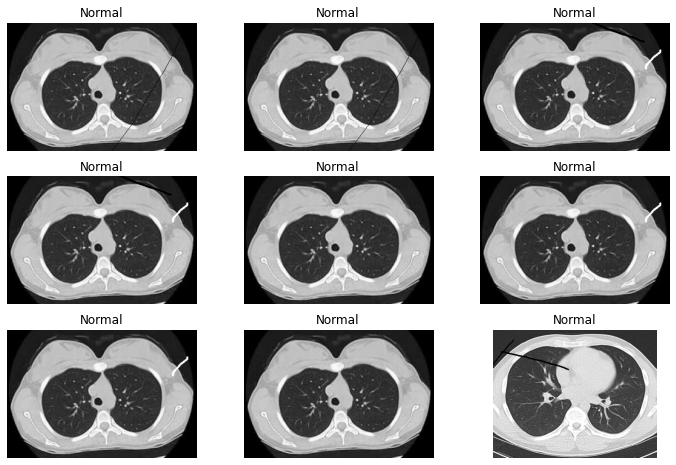

In [60]:
plt.figure(figsize=(12,8))
p = os.listdir(r'C:\Users\Lenovo\Documents\Zahid\MAKAUT\Project\Data\test/')
c=1
for i in os.listdir(r'C:\Users\Lenovo\Documents\Zahid\MAKAUT\Project\Data\test\normal/')[:9]:
    plt.subplot(3,3,c)
    
    img = cv2.imread(r'C:\Users\Lenovo\Documents\Zahid\MAKAUT\Project\Data\test\normal/'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = RF.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1

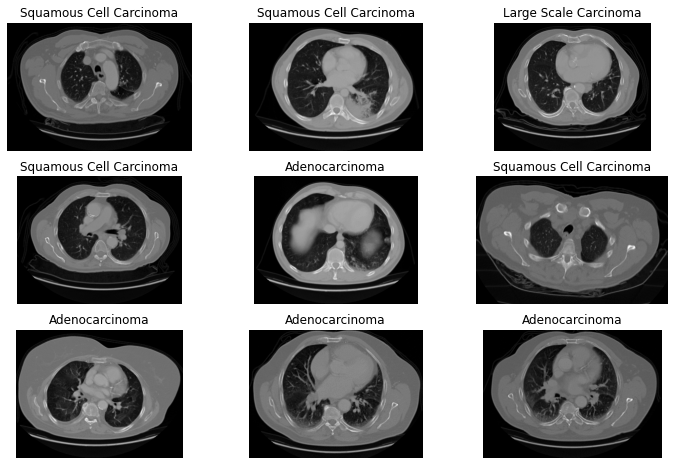

In [61]:
plt.figure(figsize=(12,8))
p = os.listdir(r'C:\Users\Lenovo\Documents\Zahid\MAKAUT\Project\Data\test/')
c=1
for i in os.listdir(r'C:\Users\Lenovo\Documents\Zahid\MAKAUT\Project\Data\test\squamous.cell.carcinoma/')[:9]:
    plt.subplot(3,3,c)
    
    img = cv2.imread(r'C:\Users\Lenovo\Documents\Zahid\MAKAUT\Project\Data\test\squamous.cell.carcinoma/'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = RF.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1

####  Model 5: XGBoost

In [62]:
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
XGB = XGBClassifier()
XGB.fit(xtrain, ytrain)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [63]:
y_predict = XGB.predict(xtest)

#  prediction Summary by species
print(classification_report(ytest, y_predict))

# Accuracy score
print(confusion_matrix(ytest,y_predict))
XGB_SC = accuracy_score(y_predict,ytest)
print(f"{round(XGB_SC*100,2)}% Accurate")

              precision    recall  f1-score   support

           0       0.82      0.84      0.83        43
           1       1.00      0.79      0.88        24
           2       0.78      1.00      0.88        28
           3       0.79      0.68      0.73        28

    accuracy                           0.83       123
   macro avg       0.85      0.83      0.83       123
weighted avg       0.84      0.83      0.83       123

[[36  0  3  4]
 [ 2 19  2  1]
 [ 0  0 28  0]
 [ 6  0  3 19]]
82.93% Accurate


In [64]:
dec = {0:'Adenocarcinoma', 1:'Large Scale Carcinoma', 2:'Normal', 3:'Squamous Cell Carcinoma'}

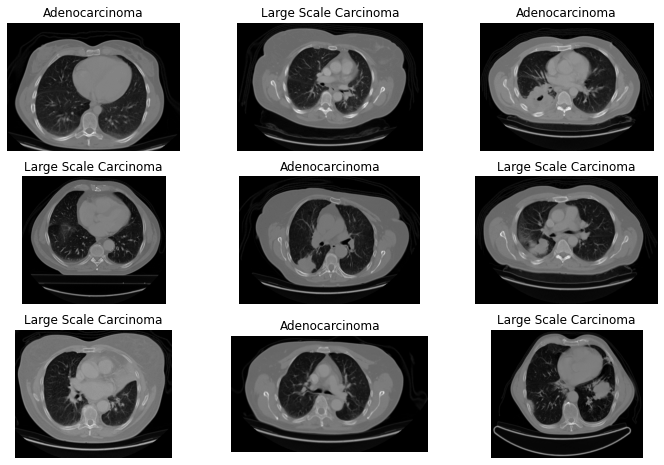

In [65]:
plt.figure(figsize=(12,8))
p = os.listdir(r'C:\Users\Lenovo\Documents\Zahid\MAKAUT\Project\Data\test/')
c=1
for i in os.listdir(r'C:\Users\Lenovo\Documents\Zahid\MAKAUT\Project\Data\test\adenocarcinoma/')[:9]:
    plt.subplot(3,3,c)
    
    img = cv2.imread(r'C:\Users\Lenovo\Documents\Zahid\MAKAUT\Project\Data\test\adenocarcinoma/'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = XGB.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1

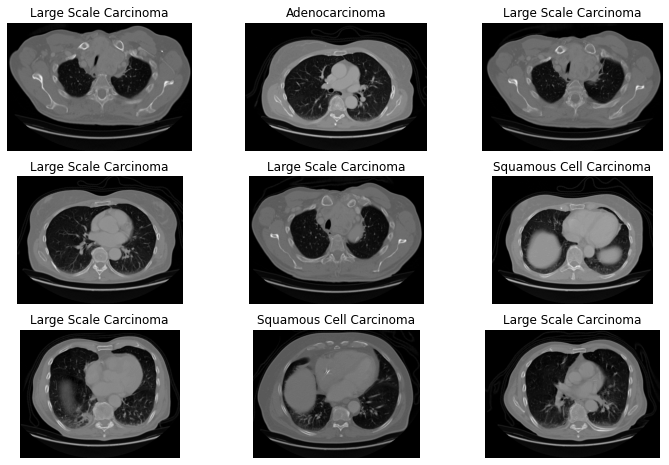

In [66]:
plt.figure(figsize=(12,8))
p = os.listdir(r'C:\Users\Lenovo\Documents\Zahid\MAKAUT\Project\Data\test/')
c=1
for i in os.listdir(r'C:\Users\Lenovo\Documents\Zahid\MAKAUT\Project\Data\test\large.cell.carcinoma/')[:9]:
    plt.subplot(3,3,c)
    
    img = cv2.imread(r'C:\Users\Lenovo\Documents\Zahid\MAKAUT\Project\Data\test\large.cell.carcinoma/'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = XGB.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1

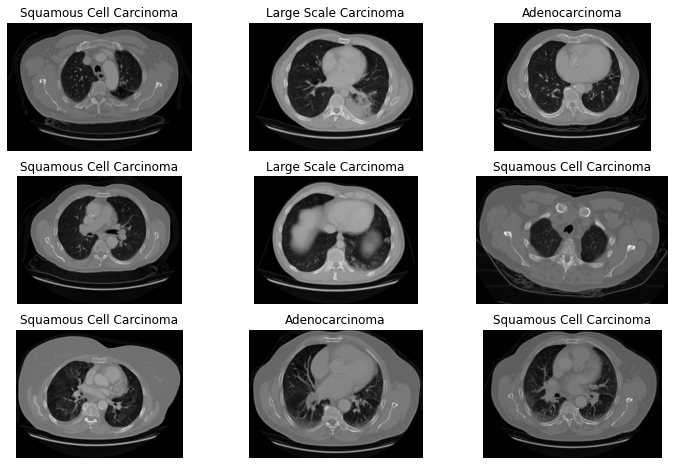

In [67]:
plt.figure(figsize=(12,8))
p = os.listdir(r'C:\Users\Lenovo\Documents\Zahid\MAKAUT\Project\Data\test/')
c=1
for i in os.listdir(r'C:\Users\Lenovo\Documents\Zahid\MAKAUT\Project\Data\test\squamous.cell.carcinoma/')[:9]:
    plt.subplot(3,3,c)
    
    img = cv2.imread(r'C:\Users\Lenovo\Documents\Zahid\MAKAUT\Project\Data\test\squamous.cell.carcinoma/'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = XGB.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1

#### Comparison of all the Models used

In [69]:
lg_accuracy_score=lg.score(xtest,ytest)*100
lg_accuracy_percent=round(lg_accuracy_score,2)
print("The Accuracy Percentage of Logistic Regression is",lg_accuracy_percent,"%")

The Accuracy Percentage of Logistic Regression is 83.74 %


In [70]:
svm_accuracy_score=sv.score(xtest,ytest)*100
svm_accuracy_percent=round(svm_accuracy_score,2)
print("The Accuracy Percentage of SVM is",svm_accuracy_percent,"%")

The Accuracy Percentage of SVM is 78.05 %


In [71]:
RF_SC = accuracy_score(predictions,ytest)
random_forest_acc_percent=RF_SC*100
print("The Accuracy Percentage of Random Forest is",round(random_forest_acc_percent,2),"%")

The Accuracy Percentage of Random Forest is 82.11 %


In [72]:
XGB_SC = accuracy_score(y_predict,ytest)
xgb_acc_percent=XGB_SC*100
print("The Accuracy Percentage of XGBoost is",round(xgb_acc_percent,2),"%")

The Accuracy Percentage of XGBoost is 82.93 %


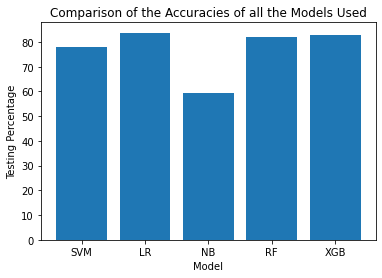

In [73]:
# Create a bar chart
plt.bar(['SVM', 'LR','NB','RF','XGB'], [svm_accuracy_percent, lg_accuracy_percent,model_accuracy_percent,random_forest_acc_percent,xgb_acc_percent])

# Set the axis labels and title
plt.xlabel('Model')
plt.ylabel('Testing Percentage')
plt.title('Comparison of the Accuracies of all the Models Used')
# Show the plot
plt.show()

In [84]:
rounded_scores = [round(score, 2) for score in score]

Models = pd.DataFrame({
    'Algorithms Used': ["Support Vector Machine", "Random Forest", "Naive Bayes", "Logistic Regression", "XGBoost"],
    'Accuracy Percentage': rounded_scores
})

Models.sort_values(by='Accuracy Percentage', ascending=False)


Algorithms Used  Accuracy Percentage
3     Logistic Regression                83.74
4                 XGBoost                82.93
1           Random Forest                82.11
0  Support Vector Machine                78.05
2             Naive Bayes                59.35